# Importing needed packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dense
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
california_housing = fetch_california_housing() # dataset from sklearn

In [3]:
california_housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [4]:
X = california_housing["data"]
y = california_housing["target"]

In [5]:
print(X[:5])

[[ 8.32520000e+00  4.10000000e+01  6.98412698e+00  1.02380952e+00
   3.22000000e+02  2.55555556e+00  3.78800000e+01 -1.22230000e+02]
 [ 8.30140000e+00  2.10000000e+01  6.23813708e+00  9.71880492e-01
   2.40100000e+03  2.10984183e+00  3.78600000e+01 -1.22220000e+02]
 [ 7.25740000e+00  5.20000000e+01  8.28813559e+00  1.07344633e+00
   4.96000000e+02  2.80225989e+00  3.78500000e+01 -1.22240000e+02]
 [ 5.64310000e+00  5.20000000e+01  5.81735160e+00  1.07305936e+00
   5.58000000e+02  2.54794521e+00  3.78500000e+01 -1.22250000e+02]
 [ 3.84620000e+00  5.20000000e+01  6.28185328e+00  1.08108108e+00
   5.65000000e+02  2.18146718e+00  3.78500000e+01 -1.22250000e+02]]


In [6]:
print(y[:5])

[4.526 3.585 3.521 3.413 3.422]


# taining,testing and evaluation sets 

In [7]:
X_train0, X_test, y_train0, y_test = train_test_split(X, y, test_size=0.2, random_state=616)

In [33]:
print(f" training set size: {X_train0.shape, y_train0.shape }")

 training set size: ((16512, 8), (16512,))


In [34]:
print(f" testing set size: {X_test.shape, y_test.shape }")

 testing set size: ((4128, 8), (4128,))


In [35]:
X_train, X_validation, y_train , y_validation = train_test_split(
    X_train0, y_train0, test_size=0.1, random_state=616
)

In [36]:
print(f" training set size: {X_train.shape, y_train.shape }")

 training set size: ((14860, 8), (14860,))


In [37]:
print(f" Evaluating set size: {X_validation.shape, y_validation.shape }")

 Evaluating set size: ((1652, 8), (1652,))


In [13]:
print(f" testing set size: {X_test.shape, y_test.shape }")

 testing set size: ((4128, 8), (4128,))


# Noirmalizing the data

In [14]:
sc = StandardScaler()

In [15]:
X_train = sc.fit_transform(X_train)

X_validation = sc.transform(X_validation)
X_test = sc.transform(X_test)

In [16]:
print(X_train[0])

[ 0.05377367  0.58427147 -0.07899328 -0.29522748 -0.14746482  0.08029856
 -0.78083309  0.74509886]


In [17]:
print(X_validation[0])

[-0.45884649 -0.05284859  0.09579534  0.1606834   0.84138953  0.04831805
  1.11905634 -1.15896718]


In [18]:
print(X_test[0])

[-1.22379944  0.9028315  -0.79846586 -0.1785435   0.93275108  0.06653348
 -0.78083309  0.64514788]


# Model

In [19]:
model = Sequential(
    [
        Dense(units=50, activation="relu"),
        Dense(units=10, activation="relu"),
        Dense(units=1) # No activation function needed but it depends, we could use relu or ...
    ]
)

# Compiling the model

In [20]:
model.compile(
    loss= "mean_squared_error",
    optimizer="sgd",
    metrics=["mean_absolute_error"]
)

In [21]:
history  = model.fit(
    X_train, y_train, epochs=30,validation_data=(X_validation, y_validation)
)

Epoch 1/30
465/465 [==============================] - 1s 2ms/step - loss: 1.0672 - mean_absolute_error: 0.6428 - val_loss: 0.5235 - val_mean_absolute_error: 0.5326
Epoch 2/30
465/465 [==============================] - 1s 1ms/step - loss: 0.4942 - mean_absolute_error: 0.5126 - val_loss: 0.4332 - val_mean_absolute_error: 0.4873
Epoch 3/30
465/465 [==============================] - 1s 1ms/step - loss: 0.4443 - mean_absolute_error: 0.4796 - val_loss: 0.3984 - val_mean_absolute_error: 0.4603
Epoch 4/30
465/465 [==============================] - 1s 1ms/step - loss: 0.4189 - mean_absolute_error: 0.4628 - val_loss: 0.3836 - val_mean_absolute_error: 0.4365
Epoch 5/30
465/465 [==============================] - 1s 1ms/step - loss: 0.4026 - mean_absolute_error: 0.4532 - val_loss: 0.3648 - val_mean_absolute_error: 0.4275
Epoch 6/30
465/465 [==============================] - 1s 1ms/step - loss: 0.3935 - mean_absolute_error: 0.4476 - val_loss: 0.3624 - val_mean_absolute_error: 0.4193
Epoch 7/30
465/4

In [22]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 465}

In [23]:
print(history.history)

{'loss': [1.067219614982605, 0.4941852390766144, 0.4443083703517914, 0.4188874065876007, 0.40257081389427185, 0.3935029208660126, 0.3831004202365875, 0.3749765455722809, 0.3677677810192108, 0.3628949522972107, 0.3578566908836365, 0.35375604033470154, 0.34959664940834045, 0.34717878699302673, 0.34420937299728394, 0.34210553765296936, 0.33710843324661255, 0.33420875668525696, 0.33232325315475464, 0.3292160630226135, 0.32763150334358215, 0.3239983916282654, 0.32282528281211853, 0.3213827311992645, 0.31886205077171326, 0.3172130882740021, 0.3205361068248749, 0.31491878628730774, 0.3135465979576111, 0.3124276399612427], 'mean_absolute_error': [0.6427509784698486, 0.5126342177391052, 0.4796411395072937, 0.4628375768661499, 0.453244149684906, 0.44755882024765015, 0.4401673674583435, 0.43533629179000854, 0.43113037943840027, 0.4281463027000427, 0.4241950809955597, 0.4213934540748596, 0.41902071237564087, 0.41806840896606445, 0.4147050082683563, 0.41243448853492737, 0.4095199704170227, 0.407573

In [24]:
history.history.keys()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])

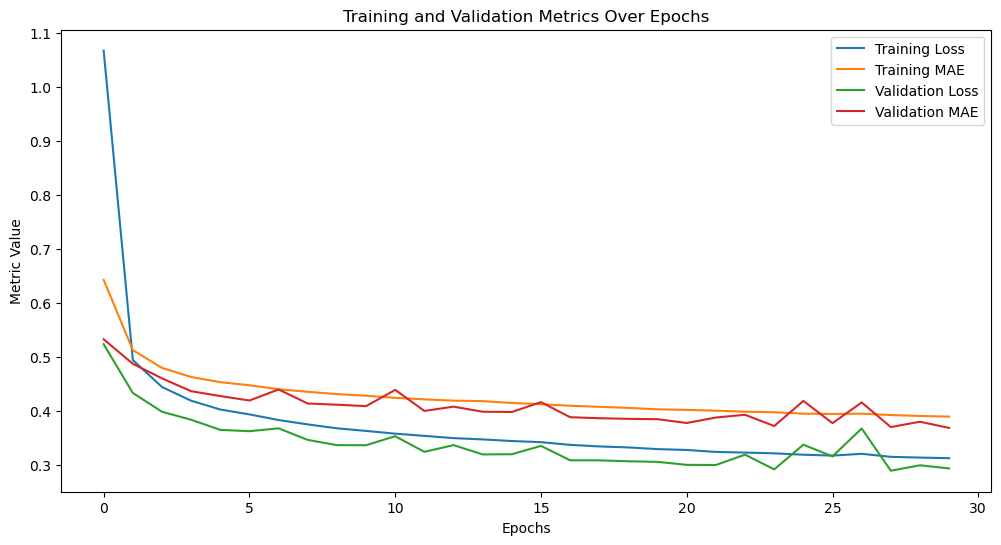

In [25]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(history.history["loss"], label="Training Loss")
ax.plot(history.history["mean_absolute_error"], label="Training MAE")
ax.plot(history.history["val_loss"], label="Validation Loss")
ax.plot(history.history["val_mean_absolute_error"], label="Validation MAE")

ax.set_xlabel("Epochs")
ax.set_ylabel("Metric Value")
ax.set_title("Training and Validation Metrics Over Epochs")
ax.legend()
plt.show()




In [26]:
model.evaluate(X_test, y_test, verbose=1)

129/129 [==============================] - 0s 1ms/step - loss: 0.3186 - mean_absolute_error: 0.3851


[0.3186250925064087, 0.3851141929626465]

In [28]:
x_new = X_test[1:5]
x_new.shape

(4, 8)

In [31]:
model.predict(x_new)

1/1 [==============================] - 0s 24ms/step


array([[1.8094711],
       [1.149153 ],
       [1.8289695],
       [1.1947889]], dtype=float32)

In [32]:
y_test[1:5]

array([1.825, 0.842, 2.509, 1.359])